## Group 2A11
- 

## Group Contributions Statement

In [16]:
penguins

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,PAL0910,120,Gentoo,Anvers,Biscoe,"Adult, 1 Egg Stage",N38A2,No,12/1/09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
340,PAL0910,121,Gentoo,Anvers,Biscoe,"Adult, 1 Egg Stage",N39A1,Yes,11/22/09,46.8,14.3,215.0,4850.0,FEMALE,8.41151,-26.13832,NaN
341,PAL0910,122,Gentoo,Anvers,Biscoe,"Adult, 1 Egg Stage",N39A2,Yes,11/22/09,50.4,15.7,222.0,5750.0,MALE,8.30166,-26.04117,NaN
342,PAL0910,123,Gentoo,Anvers,Biscoe,"Adult, 1 Egg Stage",N43A1,Yes,11/22/09,45.2,14.8,212.0,5200.0,FEMALE,8.24246,-26.11969,NaN


## Data Import and Cleaning

In [21]:
#imports
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
from sklearn.model_selection import train_test_split

#getting the data
url = "https://philchodrow.github.io/PIC16A/datasets/palmer_penguins.csv"
penguins = pd.read_csv(url)


#splitting the data set
X=penguins[["Culmen Depth (mm)", "Body Mass (g)", "Island"]]
y=penguins["Species"]


X_train,X_test=train_test_split(X,test_size=.2)
y_train,y_test=train_test_split(y,test_size=.2)

X_train

,Culmen Depth (mm),Body Mass (g),Island
43,19.7,4400.0,Dream
318,14.4,4625.0,Biscoe
42,18.5,3100.0,Dream
183,20.8,4300.0,Dream
166,17.1,3575.0,Dream
...,...,...,...
212,19.5,3950.0,Dream
324,13.8,4725.0,Biscoe
68,16.6,3050.0,Torgersen
71,18.4,3900.0,Torgersen


In [22]:
#simplify species names
y_train=y_train.str.split().str.get(0)
y_test=y_test.str.split().str.get(0)

X_train #currently has 275 rows
#get rid of nans. is it possible to have nans in different rows for culmen depth and body mass, 
#would that affect data cleaning

X_train=X_train.dropna()  #273
X_test=X_test.dropna()
y_train=y_train.dropna()  #273
y_test=y_test.dropna()

#changing species names to numbers
y_train=le.fit_transform(y_train)
y_test=le.fit_transform(y_test)   #do we need to shorten names and change numbers?




#X_train[X_train["Culmen Depth (mm)"]==np.nan] #no nan values in X_train or X_test

## Exploratory Analysis

AttributeError: 'numpy.ndarray' object has no attribute 'hist'

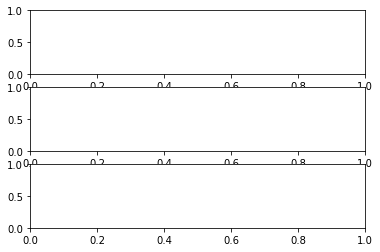

In [23]:
#histogram of body mass separated by island
fig, ax = plt.subplots(3, 1)
penguins[["Body Mass (g)", "Island"]].groupby(["Island"]).apply(ax.hist, alpha = 0.5)

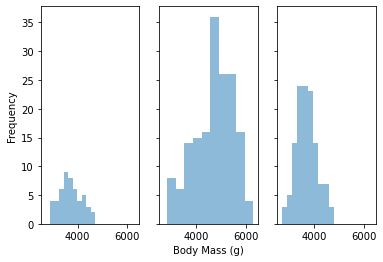

In [31]:
#histogram, body mass of each penguin grouped by island

fig,ax = plt.subplots(1, 3, sharey = True, sharex = True)
ax[0].set(ylabel = "Frequency")
ax[1].set(xlabel = "Body Mass (g)")

Islands=penguins["Island"].unique()
for i in range(np.size(Islands)):
    test = penguins[penguins["Island"]==Islands[i]]
    ax[i].hist(test["Body Mass (g)"], alpha = 0.5, label = Islands[i])

In [25]:
penguins["Species"] = penguins["Species"].str.split().str.get(0)
penguins[["Body Mass (g)", "Island", "Species"]].groupby(["Island", "Species"]).describe()

Body Mass (g)                                           \
                            count         mean         std     min     25%   
Island    Species                                                            
Biscoe    Adelie             44.0  3709.659091  487.733722  2850.0  3387.5   
          Gentoo            123.0  5076.016260  504.116237  3950.0  4700.0   
Dream     Adelie             56.0  3688.392857  455.146437  2900.0  3387.5   
          Chinstrap          68.0  3733.088235  384.335081  2700.0  3487.5   
Torgersen Adelie             51.0  3706.372549  445.107940  2900.0  3337.5   

                                              
                        50%      75%     max  
Island    Species                             
Biscoe    Adelie     3750.0  3975.00  4775.0  
          Gentoo     5000.0  5500.00  6300.0  
Dream     Adelie     3575.0  3981.25  4650.0  
          Chinstrap  3700.0  3950.00  4800.0  
Torgersen Adelie     3700.0  4000.00  4700.0

## Feature Selection

## Modeling

## Discussion